# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [854]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns
#plt.style.use('seaborn')

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
http://www.learner.org/courses/againstallodds/about/glossary.html

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - n \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& n \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum{i=1}^N y_i = 0 \\
& n \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{n} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{n} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{n} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \sum_{i=1}^N x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2 \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x} - \hat{\beta}_1 x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [855]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [856]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [857]:
boston.data.shape

(506, 13)

In [858]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [859]:
# Print description of Boston housing data set
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Now let's explore the data set itself. 

In [860]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [861]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [862]:
print(boston.target.shape)

(506,)


In [863]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [864]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

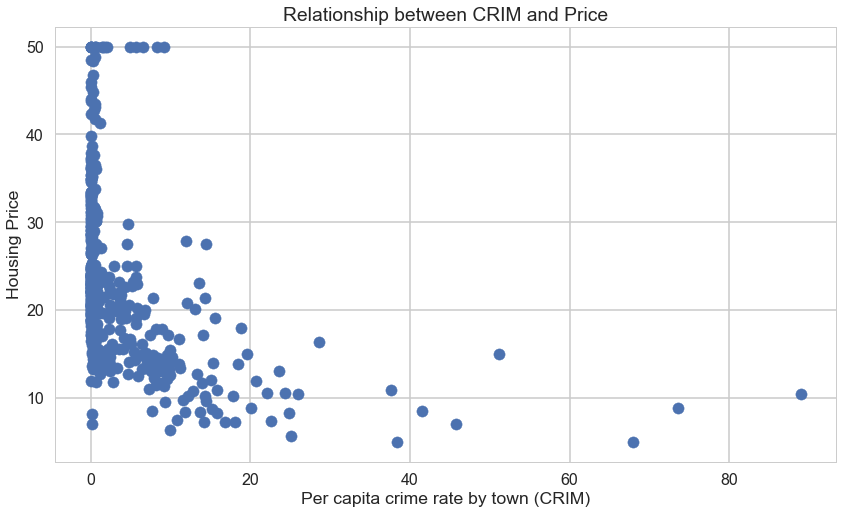

In [865]:
plt.figure(figsize=(14,8))
plt.scatter(bos.CRIM, bos.PRICE)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

In [866]:
# your turn: describe relationship
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


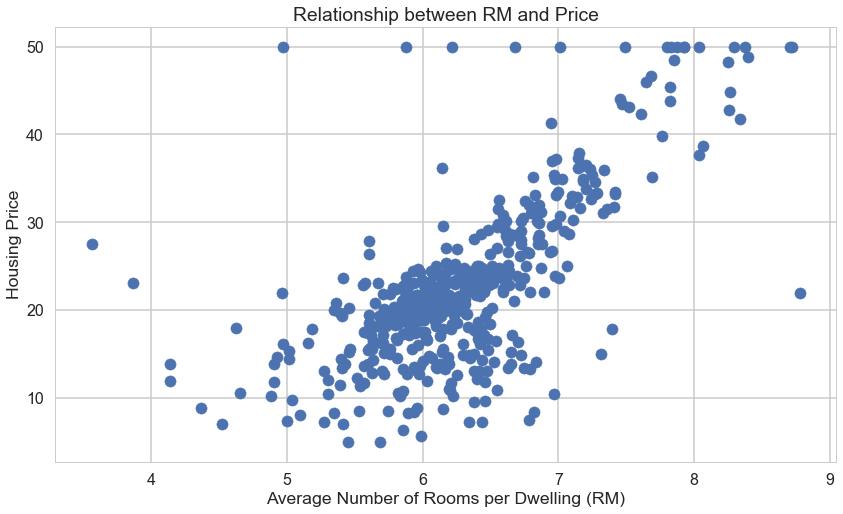

In [867]:
# your turn: scatter plot between *RM* and *PRICE*
plt.figure(figsize=(14,8))
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average Number of Rooms per Dwelling (RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

There are some outliers in our data, but we're generally seeing a positive linear relationship in the above graph. As the number of rooms in a dwelling increases, we can expect the housing price to increase. The outliers we're seeing are probably very expensive condos or one bedrooms. In general though, we know that apartments with more rooms will cost more since they are usually larger and take up more square footage area.

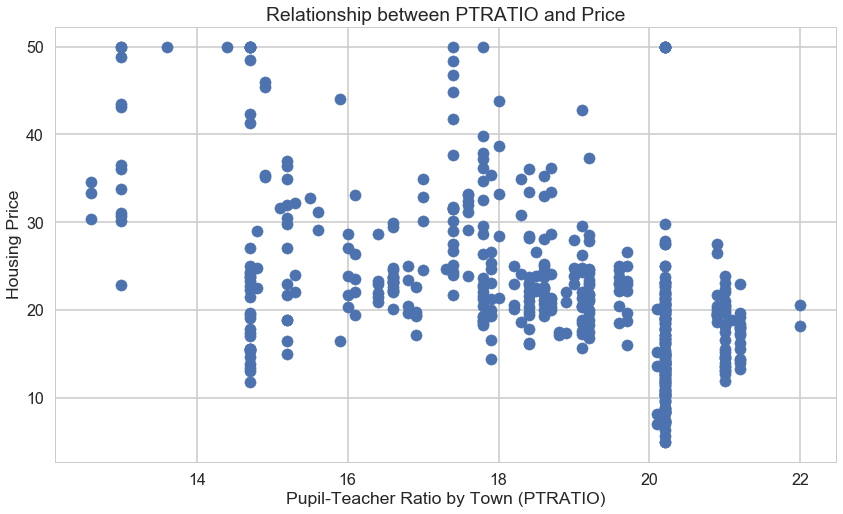

In [868]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.figure(figsize=(14,8))
plt.scatter(bos.PTRATIO, bos.PRICE)
plt.xlabel("Pupil-Teacher Ratio by Town (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

It's difficult to interpret anything from the above graph. There is no clear negative or positive relationship and if there is a relationship, it's unclear whether it's linear or not.

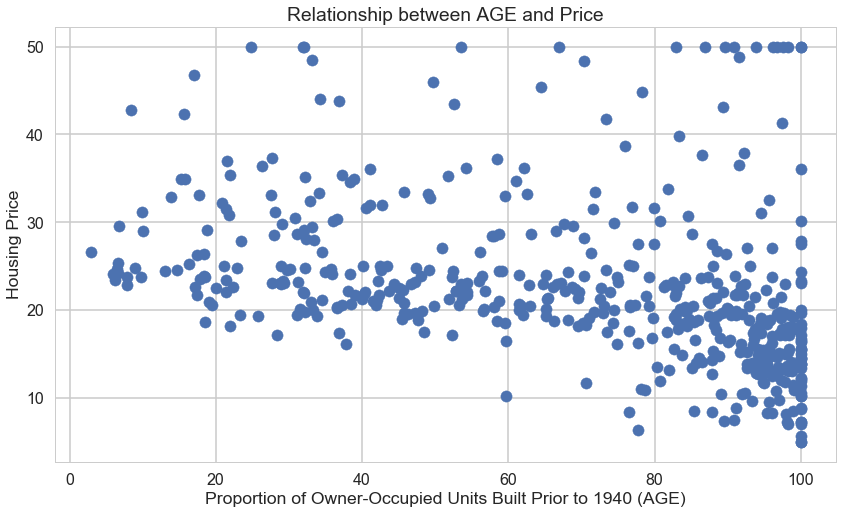

In [869]:
# your turn: create some other scatter plots
# scatter plot between *AGE* and *PRICE*
plt.figure(figsize=(14,8))
plt.scatter(bos.AGE, bos.PRICE)
plt.xlabel("Proportion of Owner-Occupied Units Built Prior to 1940 (AGE)")
plt.ylabel("Housing Price")
plt.title("Relationship between AGE and Price")

This scatterplot is a bit difficult to interpret. The relationship isn't linear, but it could be a slightly negative relationship. As AGE increases, we see a slight dip in housing prices. We also see some very high housing prices though around where we're seeing very low housing prices, so it's difficult to come to any strong conclusions.

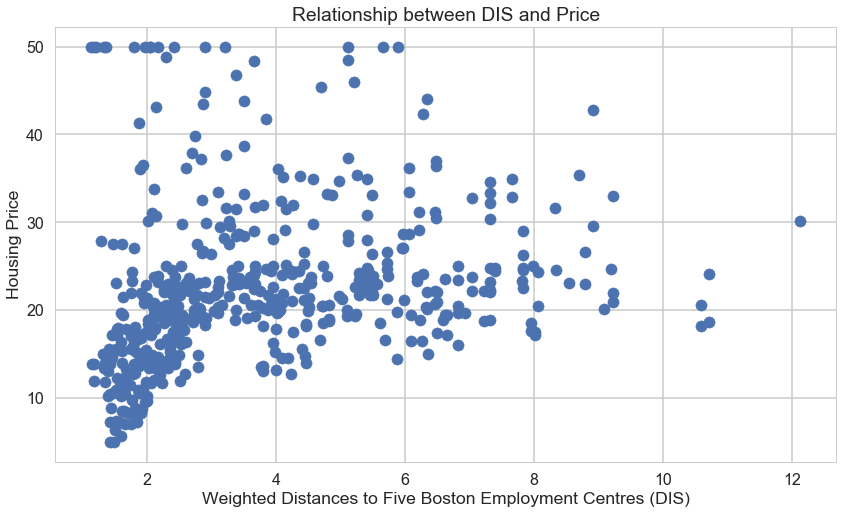

In [870]:
# scatter plot between *DIS* and *PRICE*
plt.figure(figsize=(14,8))
plt.scatter(bos.DIS, bos.PRICE)
plt.xlabel("Weighted Distances to Five Boston Employment Centres (DIS)")
plt.ylabel("Housing Price")
plt.title("Relationship between DIS and Price")

We're experiencing a bit of a similar phenomenon with this scatter plot as we did with the AGE vs. Price plot but inverted. In this scatter plot, we could be seeing a slight positive relationship, but it's definitely not linear. We see very low housing prices for low weighted distances to employment centers, but we also see some very high housing prices for those low weighted distances to employment centers. It's difficult to conclude anything from the above graph.

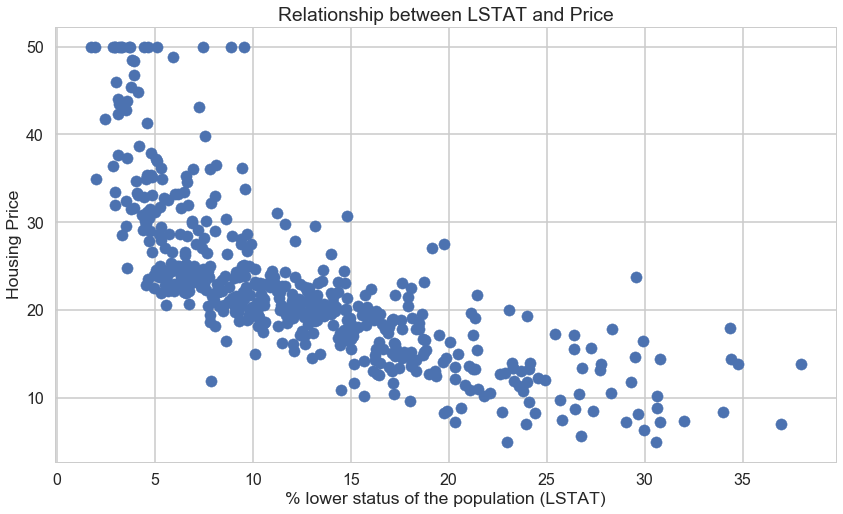

In [871]:
# scatter plot between *LSTAT* and *PRICE*
plt.figure(figsize=(14,8))
plt.scatter(bos.LSTAT, bos.PRICE)
plt.xlabel("% lower status of the population (LSTAT)")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")

We can see more of a clear relationship in the above scatter plot between LSTAT and Price. The relationship between the two variables is negative and non-linear. We can see that lower % lower status of the population tends to have higher housing prices. This makes sense, since we assume that if there are more upper status people in an area, the housing will likely be more expensive. For higher % lower status of the population, housing prices tend to be lower. We can conclude that when looking for lower housing prices, one should probably look in areas with a higher % of lower status of the population.

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

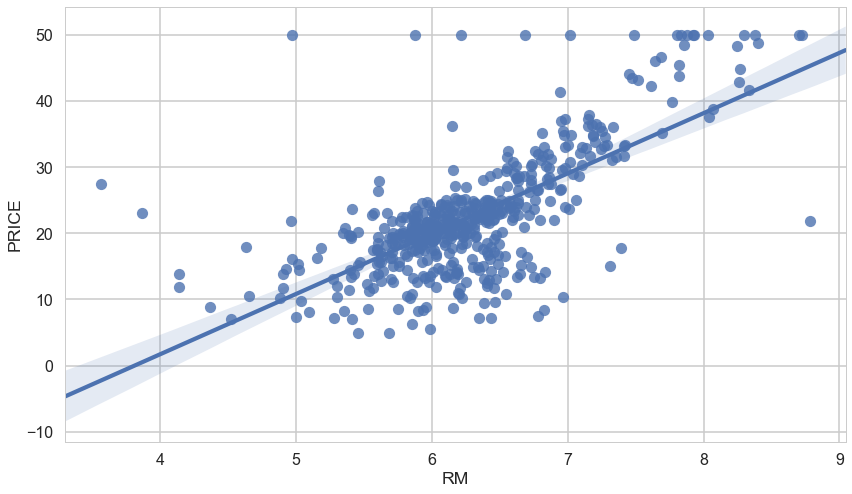

In [872]:
plt.figure(figsize=(14,8))
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True)

### Histograms
***


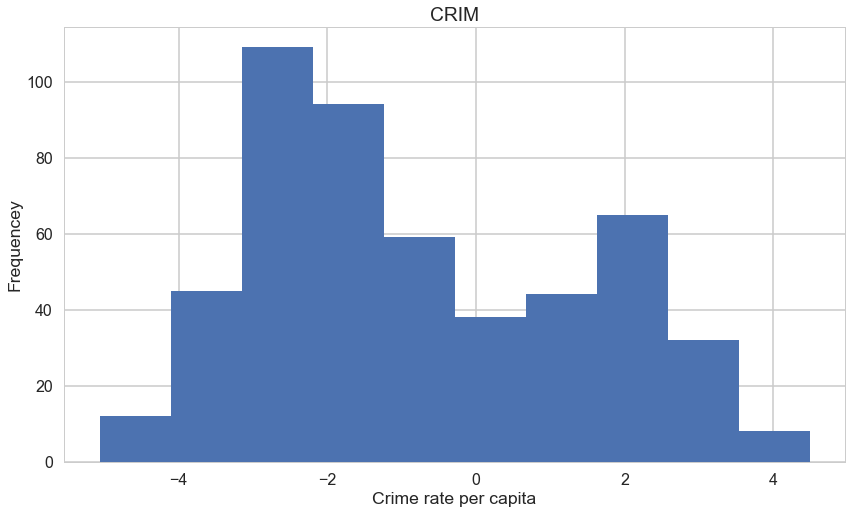

In [873]:
plt.figure(figsize=(14,8))
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

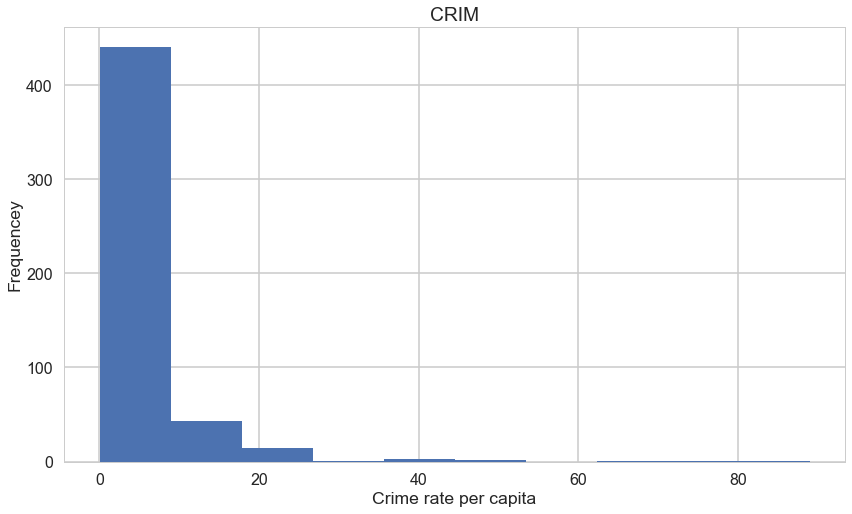

In [874]:
#your turn: CRIM histogram without taking the logarithm of CRIM
plt.figure(figsize=(14,8))
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

Histograms are useful when trying to find the distribution of a set of data. Without taking the log of our CRIM data, we can't really gain any insight from our data since most of the points are in the first bin of our histogram. Transforming the data using a logarithm help us to see the actual spread of the data and more easily identify outliers.

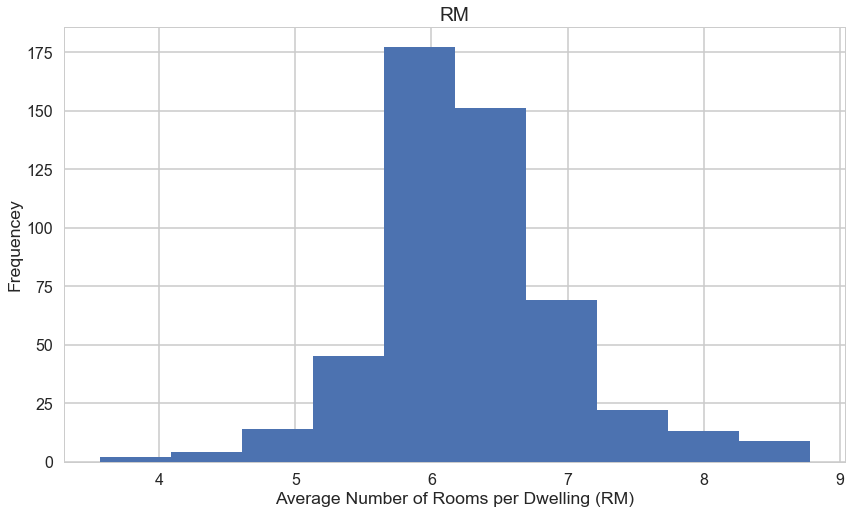

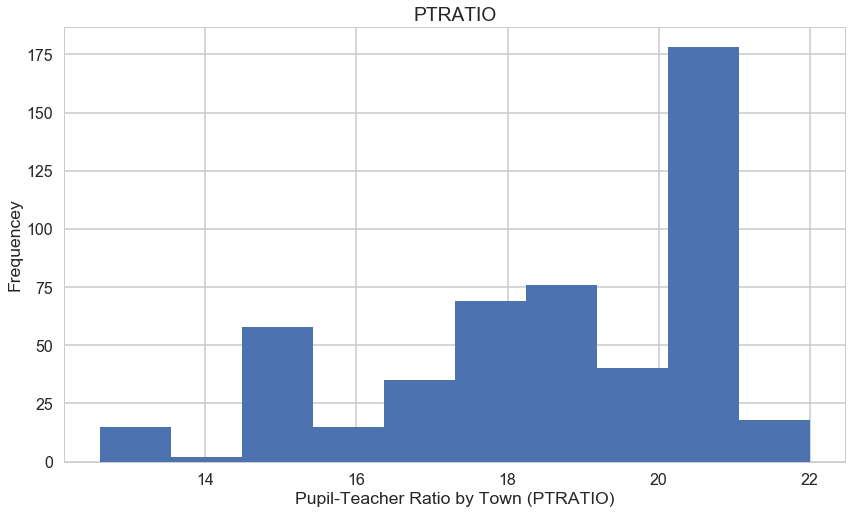

In [875]:
# RM histogram
plt.figure(figsize=(14,8))
plt.hist(bos.RM)
plt.title("RM")
plt.xlabel("Average Number of Rooms per Dwelling (RM)")
plt.ylabel("Frequencey")
plt.show()

# PTRATIO histogram
plt.figure(figsize=(14,8))
plt.hist(bos.PTRATIO)
plt.title("PTRATIO")
plt.xlabel("Pupil-Teacher Ratio by Town (PTRATIO)")
plt.ylabel("Frequencey")
plt.show()

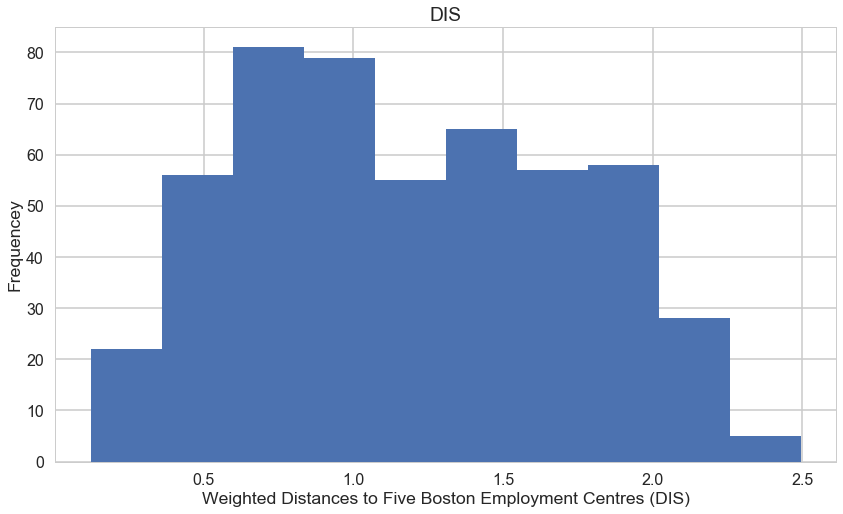

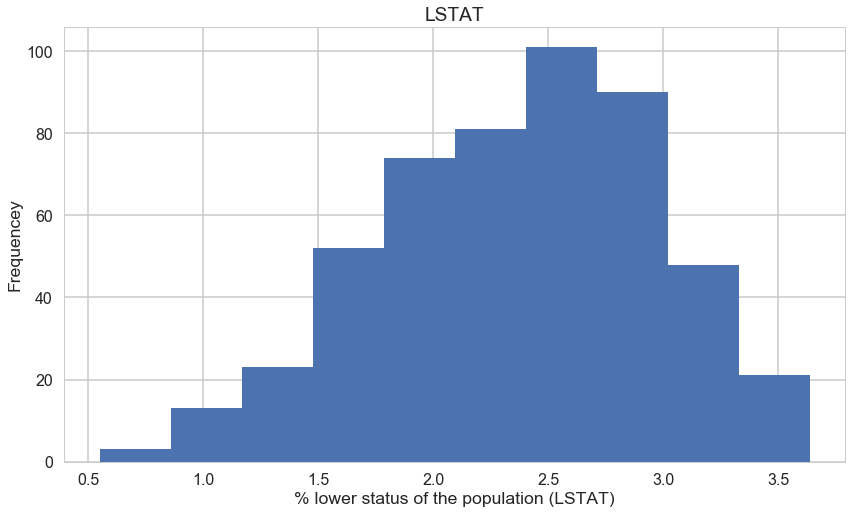

In [876]:
# DIS histogram
plt.figure(figsize=(14,8))
plt.hist(np.log(bos.DIS))
plt.title("DIS")
plt.xlabel("Weighted Distances to Five Boston Employment Centres (DIS)")
plt.ylabel("Frequencey")
plt.show()

# PTRATIO histogram
plt.figure(figsize=(14,8))
plt.hist(np.log(bos.LSTAT))
plt.title("LSTAT")
plt.xlabel("% lower status of the population (LSTAT)")
plt.ylabel("Frequencey")
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [877]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [878]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 15 Dec 2017   Prob (F-statistic):           2.49e-74
Time:                        19:31:17   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

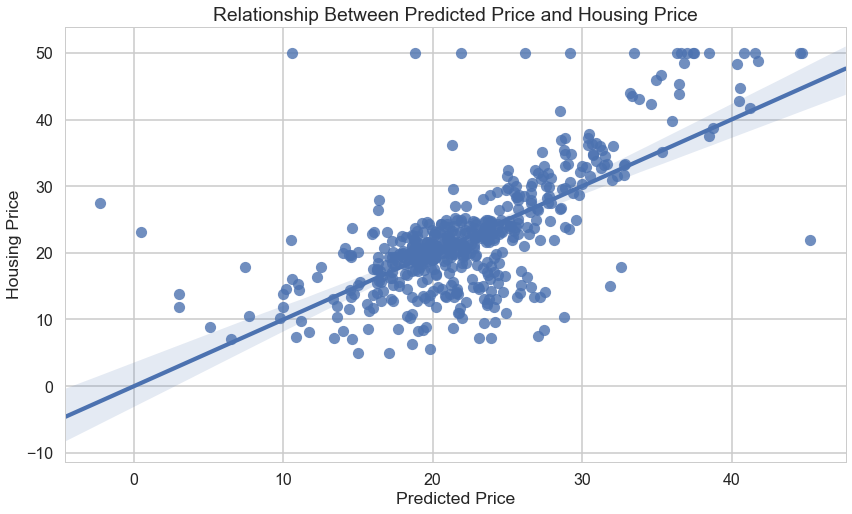

In [879]:
# your turn
plt.figure(figsize=(14,8))
sns.regplot(y="PRICE", x=m.fittedvalues, data=bos, fit_reg=True)
plt.xlabel("Predicted Price")
plt.ylabel("Housing Price")
plt.title("Relationship Between Predicted Price and Housing Price")

Most of our data follows the positive linear relationship between predicted price and housing price. There are some data points that stand out in our plot though. There are some low predicted prices that have high actual housing prices and don't follow the increasing linear trend. We can see these data points in a line across the top of the plot.

### Fitting Linear Regression using `sklearn`


In [880]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [881]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [882]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://online.stat.psu.edu/~ajw13/stat501/SpecialTopics/Reg_thru_origin.pdf).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [883]:
# your turn
# Use all 13 predictors to fit linear regression model, set lim.fit_intercept equal to False
lm.fit_intercept = False
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

Most linear regression models are expected to have an intercept value that isn't equal to zero. By omitting the intercept term, unnecessary variation is introduced into the model and we end up with bias. By allowing the model to have an intercept, we avoid introducing that bias, making our model more accurate. For this reason, I would recommend including an intercept term in the model.

Under the normal distribution, variables are are independently and identically distributed (this is a feature of the distribution). We can therefore assume that if the residuals are normally distributed, they are indeed independently and identically distributed. Not all i.i.d. variables follow a normal distribution, but all normally distributed variables are i.i.d.

False. We use linear regression to understand the expected value of Y depending on the known values of X. There are no assumptions made about the distributions of either X or Y. We can assume that the residual variance is normally distributed under the least-squares estimation of the linear model though.

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [884]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 0.0


In [885]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [886]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.091630
1,ZN,0.048675
2,INDUS,-0.003779
3,CHAS,2.856368
4,NOX,-2.880779
5,RM,5.925214
6,AGE,-0.007224
7,DIS,-0.967995
8,RAD,0.170443
9,TAX,-0.009389


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [887]:
# first five predicted prices
lm.predict(X)[0:5]

array([ 29.10255504,  24.50656965,  31.2317794 ,  29.71046643,  29.56672407])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

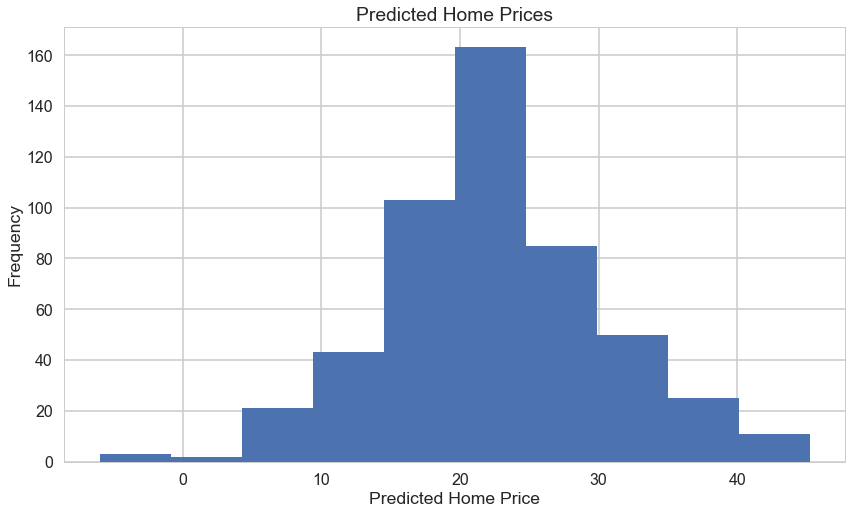

Mean of Predicted Home Prices: 22.47
Minimum of Predicted Home Prices: -5.99470474678


In [888]:
# your turn
# assign the predicted prices to a variable
pred_prices = lm.predict(X)

# construct histogram of predicted prices
plt.figure(figsize=(14,8))
plt.hist(pred_prices, bins=10)
plt.title('Predicted Home Prices')
plt.xlabel('Predicted Home Price')
plt.ylabel('Frequency')
plt.show()

# print mean of predicted prices
print('Mean of Predicted Home Prices:', round(np.mean(pred_prices),3))
print('Minimum of Predicted Home Prices:', np.min(pred_prices))

Our predicted home prices look like they're following a normal distribution. We can see that the bin with the highest frequency contains the man of the predicted home prices (22.47) and our data is shaped very similarly to a bell curve. Something that stands out is that there are negative home prices. Specifically, we can see that the minimum of our predicted home prices is a negative number.

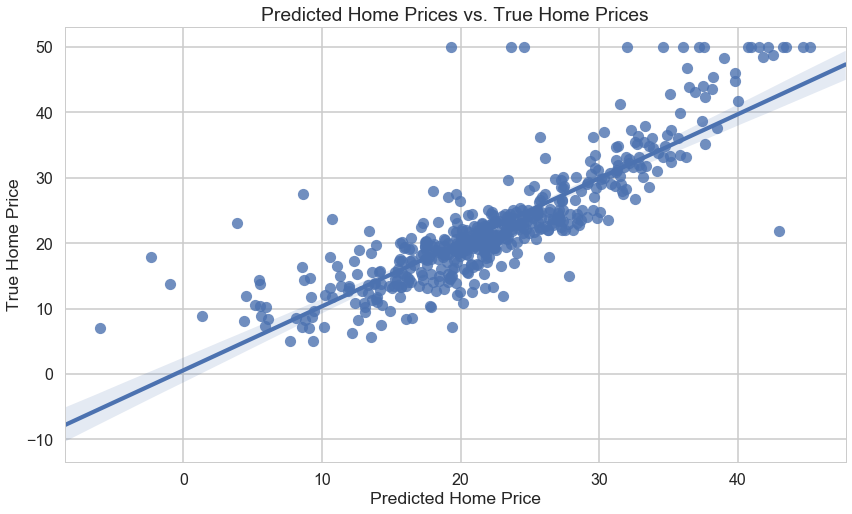

In [889]:
# construct stactter plot, predicted prices vs. true prices
plt.figure(figsize=(14,8))
scatter = sns.regplot(y=bos['PRICE'], x=pred_prices, fit_reg = True)
plt.xlabel('Predicted Home Price')
plt.ylabel('True Home Price')
plt.title('Predicted Home Prices vs. True Home Prices')
plt.show()

Statsmodels gives a nice summary of the regression we performed (for me, it's very similar to how STATA works). Scikit-learn seems to be more flexible and easier to use for machine learning.

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [890]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

12231.217345703375


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [891]:
print(np.sum(lm.predict(X) - np.mean(bos.PRICE)) ** 2)

994.791763119


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{ESS}{K}$$
$$MSR = \frac{RSS}{N-K-1}$$

**Remember: ** Notation may vary across resources particularly the use of *R* and *E* in *RSS/ESS* and *MSR/MSE*. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [892]:
# your turn

# set X
X = bos.drop('PRICE', axis = 1)
ptratio = X[['PTRATIO']]

# create LinearRegression object
lm = LinearRegression()

# use PTRATIO to fit linear regression model
lm.fit(ptratio, bos.PRICE)

# print results
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
pd.DataFrame({'features': ptratio.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

Estimated intercept coefficient: 62.344627474832706


,features,estimatedCoefficients
0,PTRATIO,-2.157175


A one unit increase in housing prices is associated with, on average, a 2.157 unit decrease in the pupil-teacher ratio. When living in a more expensive area (higher housing prices), it's likely that the pupil-teacher ratio in schools will be low.

The intercept of 62.345 is the average housing price given that the pupil-teacher ratio is equal to zero.

In [893]:
# calculate RSS, ESS, and TSS
#RSS_ptratio = np.sum((bos.PRICE - lm.predict(ptratio)) ** 2)
#ESS_ptratio = np.sum(lm.predict(ptratio) - np.mean(bos.PRICE)) ** 2
#TSS_ptratio = ESS_ptratio + RSS_ptratio

# calculate R^2 using r2_score
from sklearn.metrics import r2_score
R2_ptratio = r2_score(bos.PRICE, lm.predict(ptratio))
print('R^2:', round(R2_ptratio,3))

R^2: 0.258


This coefficient of determination (R^2) tells us what percentage of the variance in housing price is explained by this regression model. Essentially, how much of the variance in housing price is explained by the pupil-teacher ratio in schools. After calculating R^2, we've found that approximately 25.8% of the variance in housing price is explained by the pupil-teacher ratio.

In [894]:
### ATTEMPT TO CALCULATE F-STATISTIC

# calculate MSR and MSE
#MSR = RSS / (len(bos.PRICE) - len(lm.coef_) - 1)
#MSE = np.mean((bos.PRICE - lm.predict(ptratio)) ** 2)

# calculate F-statistic
#Fstat_calc = (R2_ptratio / (1-R2_ptratio)) * (( len(bos.PRICE) - len(lm.coef_) -1 ) / len(lm.coef_))
#print('F-statistic:', Fstat)

# calculate F-statistic using f1_score
#from sklearn.metrics import f1_score
#f = f1_score(bos.PRICE, lm.predict(ptratio),average='weighted')
#print(f)

In [895]:
# use statsmodel to perform regression
m2 = ols('PRICE ~ PTRATIO',bos).fit()

# print F-statistic and p value of F
print('F-statistic:', round(m2.fvalue,3))
print('F-statistic p-value:', round(m2.f_pvalue,3))

F-statistic: 175.106
F-statistic p-value: 0.0


The F-statistic is our F-critical value, which measures how significant the fit is. The p-value of our F-statistic is very small, which means that we reject the null hypothesis and conclude that the fit of the model is statistically significant.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [896]:
# your turn

# create LinearRegression object
lm = LinearRegression()

# use CRIM, RM, and PTRATIO to fit linear regression model
lm.fit(X[['CRIM','RM','PTRATIO']], bos.PRICE)

# print results
print('Estimated intercept coefficient: {}'.format(lm.intercept_))
pd.DataFrame({'features': X[['CRIM','RM','PTRATIO']].columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

Estimated intercept coefficient: -3.3066171324065294


,features,estimatedCoefficients
0,CRIM,-0.202110
1,RM,7.381567
2,PTRATIO,-1.074187


In [897]:
# use statsmodel to see a summary of regression
m3 = ols('PRICE ~ CRIM + RM + PTRATIO',bos).fit()
print(m3.summary())
f3 = m3.fvalue

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Fri, 15 Dec 2017   Prob (F-statistic):           1.09e-97
Time:                        19:31:19   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

Testing for these independent variables resulted very small p values for all three variables. This reveals that there is indeed a statistically significant relationship between housing prices and these three variables. A one unit increase in housing price in a town is associated with a .202 unit drop in the per capita crime rate and 1.07 unit drop in the pupil-teacher ratio. This means that in areas with more expensive housing, we can expect the per capita crime rate and the pupil-teacher ratio to be low. This is a good reason to move to areas with higher average housing prices. Our results also tell us that a one unit increase in housing price in a town is associated with a 7.3816 unit increase in the average number of rooms per dwelling. This means that we can expect a housing price to be more expensive if there are more rooms in the dwelling.

Our R^2 value of 0.593 reveals that 59.3% of the variance in housing price is explained by these three independent variables. Our F-statistic (or F critical) is 244.2 and we find a p-value of the F-statistic to essentially be zero. This means that the fit of our model is statistically significant and that each of our independent variables are statistically significant in predicting housing prices.

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [898]:
# use statsmodel to see a summary of regression
m4 = ols('PRICE ~ CRIM + RM + PTRATIO + LSTAT',bos).fit()
print(m4.summary())
f4 = m4.fvalue

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     267.8
Date:                Fri, 15 Dec 2017   Prob (F-statistic):          6.39e-123
Time:                        19:31:19   Log-Likelihood:                -1550.9
No. Observations:                 506   AIC:                             3112.
Df Residuals:                     501   BIC:                             3133.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.9939      3.973      4.277      0.0

In [899]:
# compute F-test
from statsmodels.stats.anova import anova_lm
anova_results = anova_lm(m3, m4)
print('F = ', anova_results.F[1])

F =  138.312972673


/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/isabelvanzijl/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [900]:
# extract AIC from both regressions
print('AIC (3 variables) =', round(m3.aic,3))
print('AIC (4 variables) =', round(m4.aic,3))

AIC (3 variables) = 3233.1
AIC (4 variables) = 3111.744


The AIC from our regression using four independent variables is smaller than the AIC from our regression using three independent variables. This means that the regression using four independent variables (the second model) is a better fit model.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

### Build Fitted Values vs. Residuals Plot

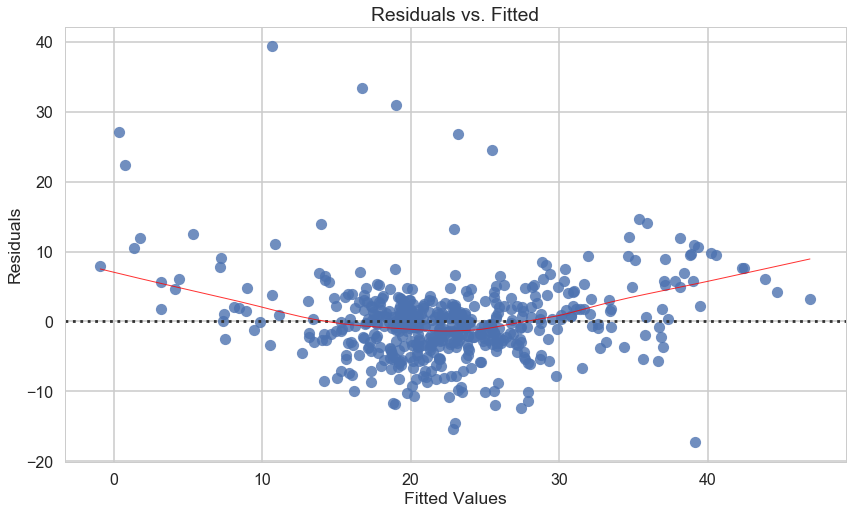

In [901]:
# Your turn.

# extract fitted values and residuals
m3_y = m3.fittedvalues
m3_residuals = m3.resid

# plot fitted values vs. residuals
resid_plot_m3 = plt.figure(figsize=(14,8))
resid_plot_m3.axes[0] = sns.residplot(m3_y, 'PRICE', data=bos, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
resid_plot_m3.axes[0].set_title('Residuals vs. Fitted')
resid_plot_m3.axes[0].set_xlabel('Fitted Values')
resid_plot_m3.axes[0].set_ylabel('Residuals')
plt.show()

Above, we have the fitted values vs. residuals plot for the regression we performed in part 3. The plot includes a lowess regression line as well for the residuals. We can see that the data points aren't very evenly distributed across the plot. They are mostly concentrated in the center and we can see some big outliers at the top of our graph. The curved lowess line (non-linear) shows that the residuals don't fit evenly around the 0 line, suggesting that the variance of the error terms aren't equal and that higher order terms need to be included in our model to make it more accurate. It could also suggest that a linear model isn't appropriate.

### Build Quantile Plot

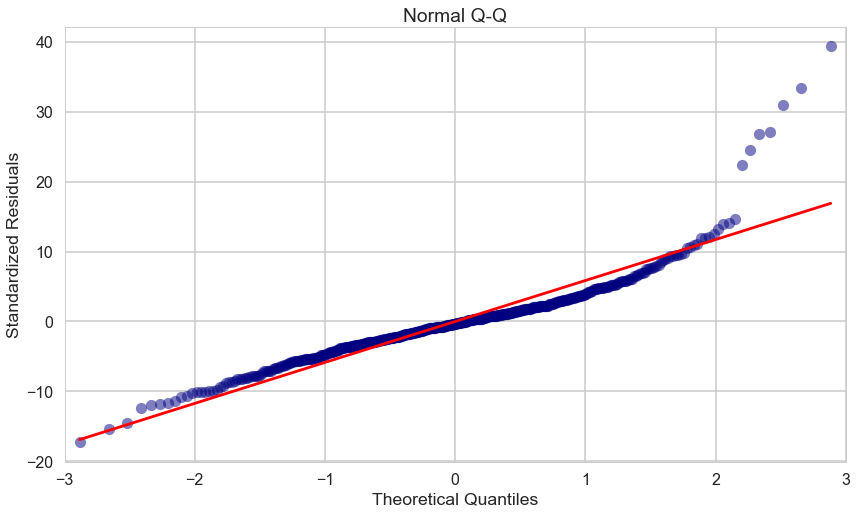

In [902]:
# construct ProbPlot
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(m3_residuals)

# construct quantile plot
plot_QQ = QQ.qqplot(line='s', alpha=0.5, color='navy')
plot_QQ.set_figheight(8)
plot_QQ.set_figwidth(14)
plot_QQ.axes[0].set_title('Normal Q-Q')
plot_QQ.axes[0].set_xlabel('Theoretical Quantiles')
plot_QQ.axes[0].set_ylabel('Standardized Residuals')
plt.show()

This plot displays how well the distribution of the residuals fits the normal distribution. The red line represents a normal distribution fit. As you can see, our residuals fit fairly well with the normal line. This means that our data is approximately normally distributed.

From the fitted vs. residual plot, we concluded that our regission isn't quite linear. From the quantile plot, we concluded that our data is approximately normally distributed. We didn't get a particularly desireable fitted vs. residual plot but our quantile plot resulted pretty nicely. 

The advantage of the first model is that it tells us whether or not we're modeling our data well. After analyzing the plot, we can gather that we should incorporate more independent variables into our study. I predict that if we built a fitted vs. residual plot for the regression we performed in Part 4, we would get a better plot since we added in another variable.

The advantage of the second plot is that we now know that the residuals are approximately normally distributed. This is assumed of a linear regression, so this plot is a nice visual check.

We can identify some outliers in the residuals in the above plots. These outliers could be suggesting that a linear model isn't a good fit to model our data, and that we should either incorporate more variables or perform a different analysis.

### Build Leverage Plot

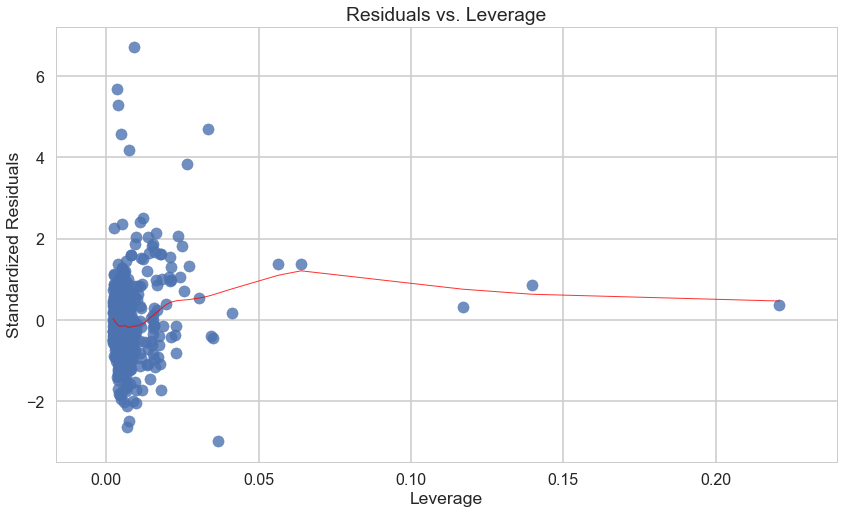

In [903]:
# compute leverage
m3_leverage = m3.get_influence().hat_matrix_diag

# normalized residuals
m3_norm_residuals = m3.get_influence().resid_studentized_internal

# construct leverage plot
leverage_plot_3 = plt.figure(figsize=(14,8))
plt.scatter(m3_leverage, m3_norm_residuals, alpha=.8)
sns.regplot(m3_leverage, m3_norm_residuals, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
leverage_plot_3.axes[0].set_title('Residuals vs. Leverage')
leverage_plot_3.axes[0].set_xlabel('Leverage')
leverage_plot_3.axes[0].set_ylabel('Standardized Residuals')

This plot helps us to identify influential points in our data. We've already discussed that we have a few outliers in our data, but this doesn't mean that those outliers are influential in our model. Our plot above actually looks pretty standard for a leverage plot. This means that our regression results wouldn't be much different if we included or excluded our outliers from the analysis. They follow the trend in the majority of cases and therefore aren't influential.

### Remove Outliers

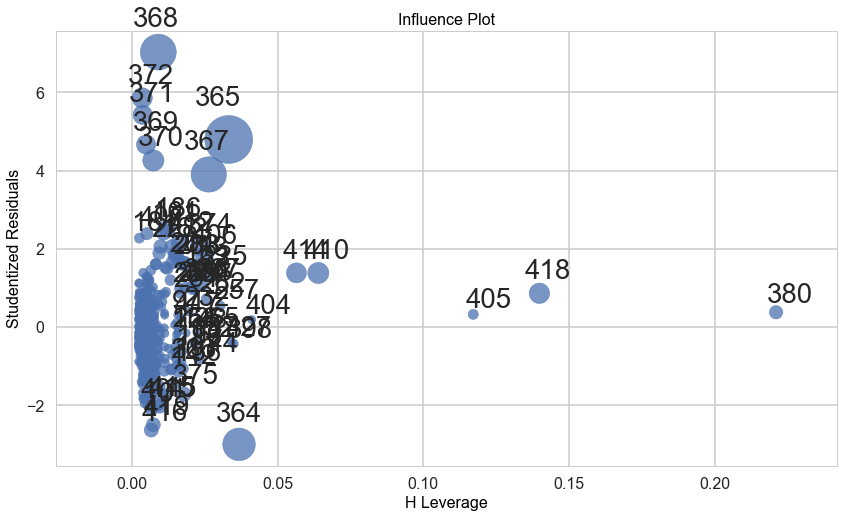

In [904]:
# plot influence plot to identify outliers and their influence
from statsmodels.graphics.regressionplots import *
fig, ax = plt.subplots(figsize=(14,8))
fig = sm.graphics.influence_plot(m3, alpha  = 0.05, ax = ax, criterion="cooks", plot_alpha=.75)

From the influence plot, we can deduct that there are some outliers that are pretty influential. For example, '365' seems to have a relatively big influence on our regression.

In [914]:
# identify outliers
outliers = [i for i in range(len(bos.PRICE)) if (abs(bos.PRICE[i] - np.mean(bos.PRICE)) > 2*np.std(bos.PRICE))]
print('Outliers:', outliers)
print('Number of outlier values:', len(outliers))

# remove outliers from boston data
bos_cleaned = bos.drop(outliers)

# print lengths of both datasets
print('Size (original):', len(bos.PRICE))
print('Size (outliers removed):', len(bos_cleaned.PRICE))

Outliers: [98, 157, 161, 162, 163, 166, 186, 195, 202, 203, 204, 224, 225, 228, 232, 233, 253, 256, 257, 261, 262, 267, 268, 280, 282, 283, 368, 369, 370, 371, 372]
Number of outlier values: 31
Size (original): 506
Size (outliers removed): 475


In [906]:
# use statsmodel to see a summary of regression
m5 = ols('PRICE ~ CRIM + RM + PTRATIO',bos_cleaned).fit()
print(m5.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     208.5
Date:                Fri, 15 Dec 2017   Prob (F-statistic):           4.87e-86
Time:                        19:31:23   Log-Likelihood:                -1383.2
No. Observations:                 475   AIC:                             2774.
Df Residuals:                     471   BIC:                             2791.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1479      3.235      1.900      0.0

In [918]:
# print regression results for original data to compare
print(m3.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     244.2
Date:                Fri, 15 Dec 2017   Prob (F-statistic):           1.09e-97
Time:                        23:05:46   Log-Likelihood:                -1612.6
No. Observations:                 506   AIC:                             3233.
Df Residuals:                     502   BIC:                             3250.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3066      4.038     -0.819      0.4

We can see that our new model excluding the outliers is a better fit than our original regression. Our R^2 value is slightly smaller, revealing that this linear model is a slightly better fit now. The size of our confidence intervals for each independent variable hasn't changed much, but the intervals and coefficients have shifted slightly. 

In [912]:
# extract AIC from both regressions
print('AIC (original) =', round(m3.aic,3))
print('AIC (outliers removed) =', round(m5.aic,3))

AIC (original) = 3233.1
AIC (outliers removed) = 2774.498


The AIC from our regression excluding outliers is smaller than the AIC from our regression using the original data points. This means that the regression using four independent variables (the second model) is a better fit model.